# Exercici 1

Parteix el conjunt de dadesDelayedFlights.csv en train i test. Estudia els dos conjunts per separat, a nivell descriptiu.

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.preprocessing import PolynomialFeatures


In [3]:
df=pd.read_csv('DelayedFlights.csv')

In [4]:
df.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [5]:
pd.set_option('display.max_columns', None)

In [6]:
#elimino la columna contador de filas Unnamed: 0
df = df.drop('Unnamed: 0', 1)

In [7]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             float64
 20  TaxiOut            float64
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       float64
 25  WeatherDelay      

In [9]:
df.describe().round(2)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1936758.0,1936758.00,1936758.00,1936758.00,1936758.00,1936758.00,1929648.00,1936758.00,1936758.00,1928371.00,1936560.00,1928371.00,1928371.00,1936758.00,1936758.00,1929648.00,1936303.00,1936758.00,1936758.00,1247488.00,1247488.00,1247488.00,1247488.00,1247488.00
mean,2008.0,6.11,15.75,3.98,1518.53,1467.47,1610.14,1634.22,2184.26,133.31,134.30,108.28,42.20,43.19,765.69,6.81,18.23,0.00,0.00,19.18,3.70,15.02,0.09,25.30
std,0.0,3.48,8.78,2.00,450.49,424.77,548.18,464.63,1944.70,72.06,71.34,68.64,56.78,53.40,574.48,5.27,14.34,0.02,0.06,43.55,21.49,33.83,2.02,42.05
min,2008.0,1.00,1.00,1.00,1.00,0.00,1.00,0.00,1.00,14.00,-25.00,0.00,-109.00,6.00,11.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2008.0,3.00,8.00,2.00,1203.00,1135.00,1316.00,1325.00,610.00,80.00,82.00,58.00,9.00,12.00,338.00,4.00,10.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,2008.0,6.00,16.00,4.00,1545.00,1510.00,1715.00,1705.00,1543.00,116.00,116.00,90.00,24.00,24.00,606.00,6.00,14.00,0.00,0.00,2.00,0.00,2.00,0.00,8.00
75%,2008.0,9.00,23.00,6.00,1900.00,1815.00,2030.00,2014.00,3422.00,165.00,165.00,137.00,56.00,53.00,998.00,8.00,21.00,0.00,0.00,21.00,0.00,15.00,0.00,33.00
max,2008.0,12.00,31.00,7.00,2400.00,2359.00,2400.00,2400.00,9742.00,1114.00,660.00,1091.00,2461.00,2467.00,4962.00,240.00,422.00,1.00,1.00,2436.00,1352.00,1357.00,392.00,1316.00


In [10]:
#obtengo dimensiones de DataFrame
df.shape

(1936758, 29)

In [11]:
#Divido el datafrma en Train y en Test con la proporcion 70/30
X_train, X_test = train_test_split(df, test_size = 0.3, random_state=7)

In [12]:
X_train.shape

(1355730, 29)

In [13]:
X_test.shape

(581028, 29)

In [14]:
X_train.describe().round(2)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1355730.0,1355730.00,1355730.00,1355730.00,1355730.00,1355730.00,1350796.00,1355730.00,1355730.00,1349908.00,1355596.00,1349908.00,1349908.00,1355730.00,1355730.00,1350796.00,1355400.00,1355730.00,1355730.00,873332.00,873332.00,873332.00,873332.00,873332.0
mean,2008.0,6.11,15.76,3.99,1518.63,1467.54,1610.09,1634.46,2183.40,133.28,134.28,108.26,42.19,43.18,765.58,6.81,18.23,0.00,0.00,19.19,3.68,15.01,0.09,25.3
std,0.0,3.48,8.78,2.00,450.59,424.87,548.45,464.67,1943.95,72.05,71.32,68.62,56.75,53.37,574.39,5.26,14.37,0.02,0.06,43.63,21.26,33.81,2.09,42.0
min,2008.0,1.00,1.00,1.00,1.00,0.00,1.00,0.00,1.00,14.00,-25.00,0.00,-109.00,6.00,11.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
25%,2008.0,3.00,8.00,2.00,1203.00,1135.00,1316.00,1325.00,611.00,80.00,82.00,58.00,9.00,12.00,338.00,4.00,10.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
50%,2008.0,6.00,16.00,4.00,1545.00,1510.00,1715.00,1706.00,1542.00,116.00,116.00,90.00,24.00,24.00,606.00,6.00,14.00,0.00,0.00,2.00,0.00,2.00,0.00,8.0
75%,2008.0,9.00,23.00,6.00,1900.00,1815.00,2031.00,2015.00,3420.00,165.00,165.00,137.00,56.00,53.00,998.00,8.00,21.00,0.00,0.00,21.00,0.00,15.00,0.00,33.0
max,2008.0,12.00,31.00,7.00,2400.00,2359.00,2400.00,2400.00,9742.00,790.00,660.00,733.00,2461.00,2467.00,4962.00,225.00,393.00,1.00,1.00,2436.00,1225.00,1337.00,392.00,1316.0


In [15]:
X_test.describe().round(2)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,581028.0,581028.00,581028.00,581028.00,581028.00,581028.00,578852.00,581028.00,581028.00,578463.00,580964.00,578463.00,578463.00,581028.00,581028.00,578852.00,580903.00,581028.00,581028.00,374156.00,374156.00,374156.00,374156.00,374156.00
mean,2008.0,6.11,15.74,3.98,1518.32,1467.31,1610.25,1633.68,2186.27,133.37,134.36,108.33,42.22,43.20,765.94,6.82,18.24,0.00,0.00,19.16,3.76,15.05,0.09,25.28
std,0.0,3.48,8.77,2.00,450.25,424.52,547.55,464.56,1946.47,72.08,71.39,68.69,56.86,53.48,574.68,5.31,14.27,0.02,0.06,43.35,22.02,33.88,1.87,42.19
min,2008.0,1.00,1.00,1.00,1.00,0.00,1.00,0.00,1.00,15.00,1.00,0.00,-69.00,6.00,24.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2008.0,3.00,8.00,2.00,1203.00,1135.00,1316.00,1325.00,609.00,80.00,82.00,58.00,9.00,12.00,338.00,4.00,10.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,2008.0,6.00,16.00,4.00,1545.00,1510.00,1715.00,1705.00,1544.00,116.00,116.00,90.00,24.00,24.00,606.00,6.00,14.00,0.00,0.00,2.00,0.00,2.00,0.00,8.00
75%,2008.0,9.00,23.00,6.00,1900.00,1815.00,2030.00,2014.00,3432.00,165.00,165.00,137.00,56.00,53.00,998.00,8.00,21.00,0.00,0.00,21.00,0.00,15.00,0.00,33.00
max,2008.0,12.00,31.00,7.00,2400.00,2359.00,2400.00,2400.00,9741.00,1114.00,660.00,1091.00,1707.00,1710.00,4962.00,240.00,422.00,1.00,1.00,1707.00,1352.00,1357.00,254.00,1303.00


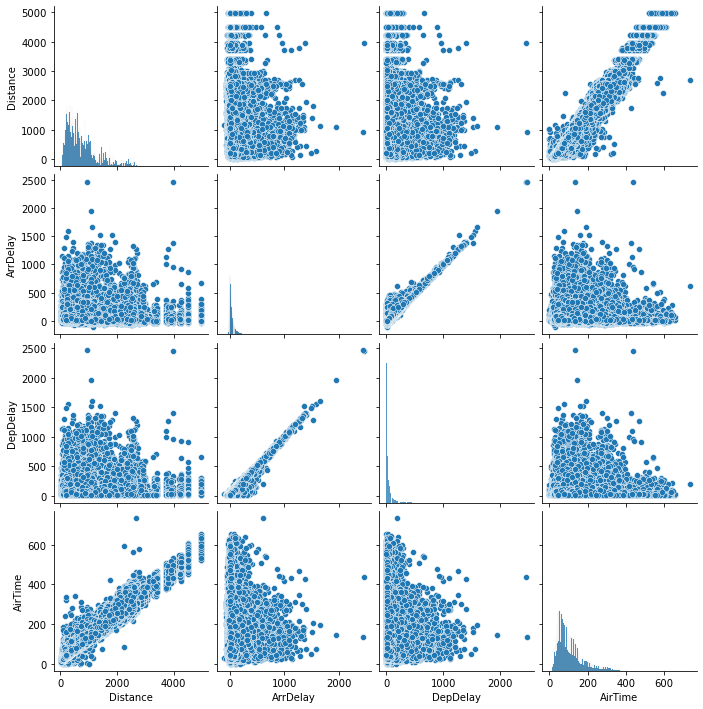

In [16]:
sns.pairplot(data=X_train[['Distance','ArrDelay', 'DepDelay','AirTime']])


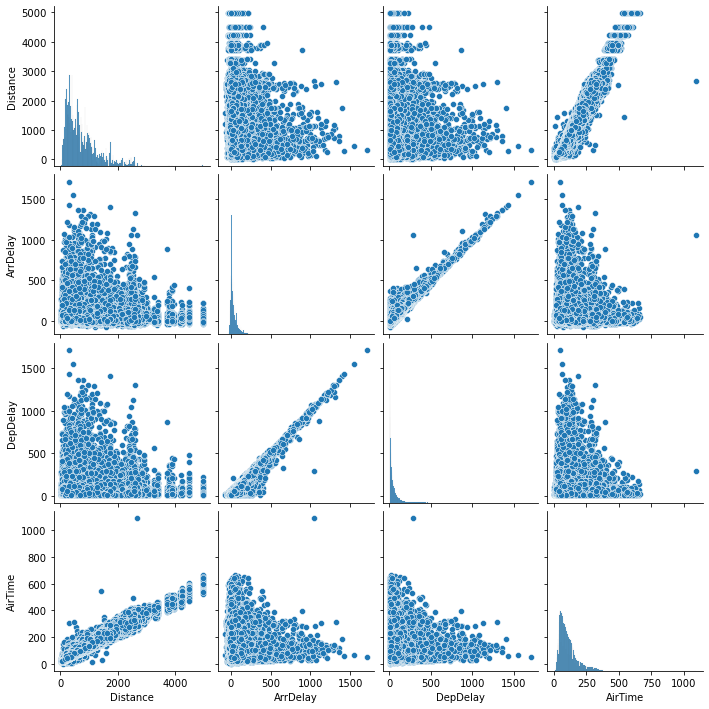

In [17]:
sns.pairplot(data=X_test[['Distance','ArrDelay', 'DepDelay','AirTime']])


Se puede observar que hay relaccion lineal entre  DepDelay y ArrDelay es logico si sale con retraso llega tambien con retraso.
Tambien se observa la relacion lineal entre AirTime y Distance y que tambine es logico.

In [18]:
corr=df.corr()

<AxesSubplot:>

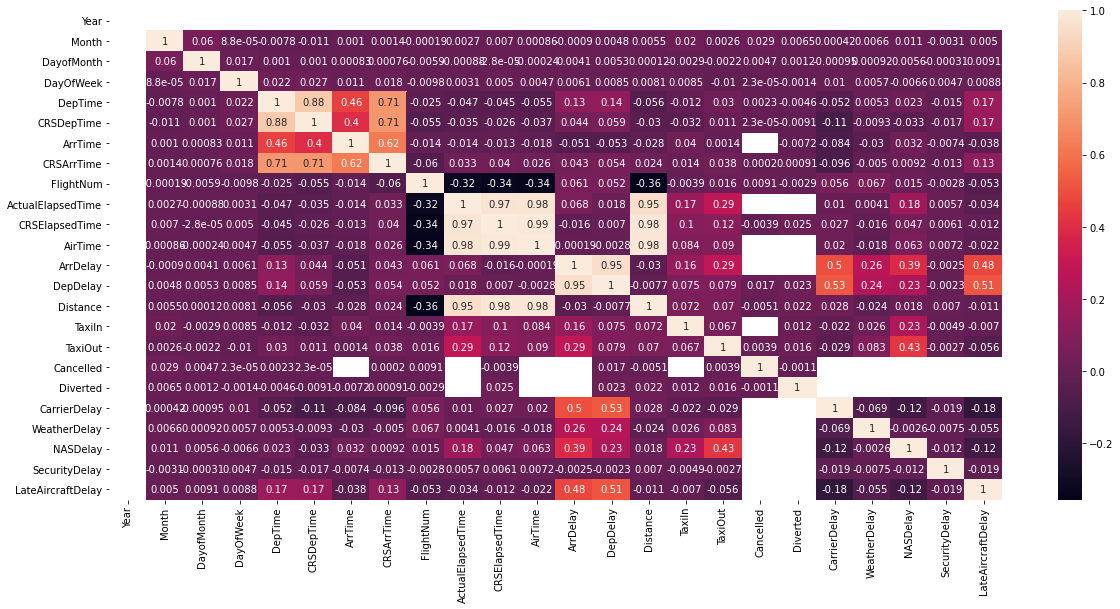

In [19]:
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corr,annot=True)

<AxesSubplot:>

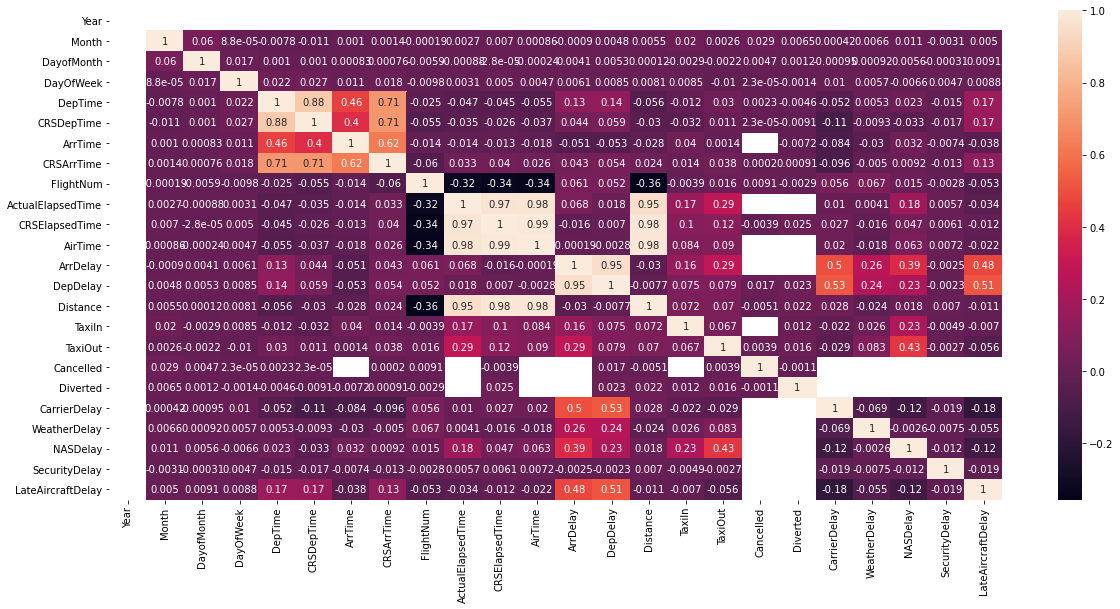

In [20]:
corr_xtest=X_test.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corr,annot=True)

<AxesSubplot:>

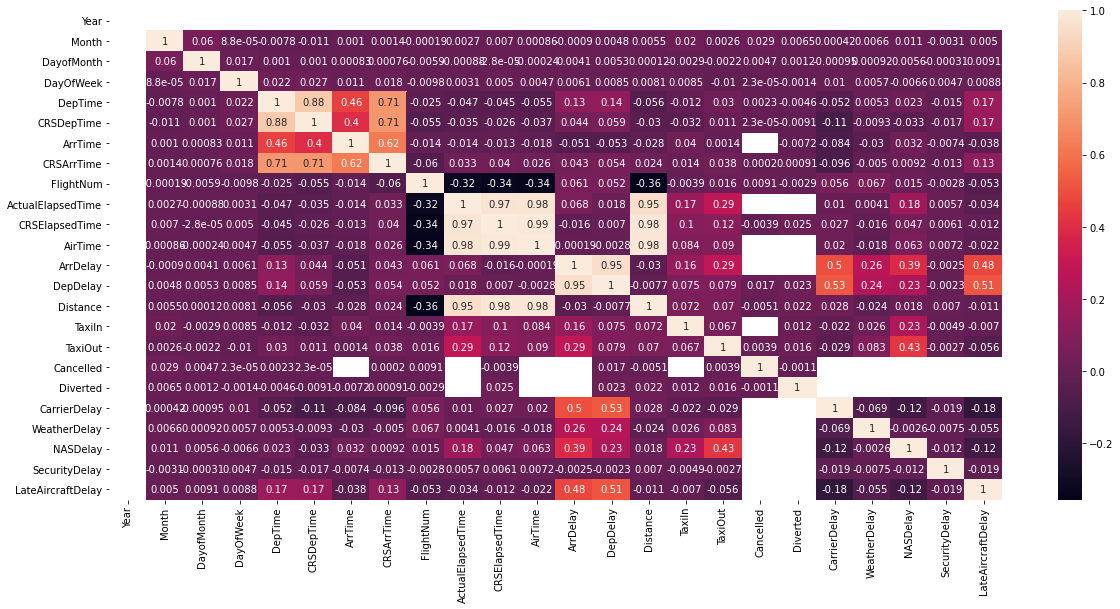

In [21]:
corr_X_train=X_train.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corr,annot=True)

Como se puede ver las matrices de correlacion y las tablas con los datos de la estadistica descriptiva son muy parecidos entre si.

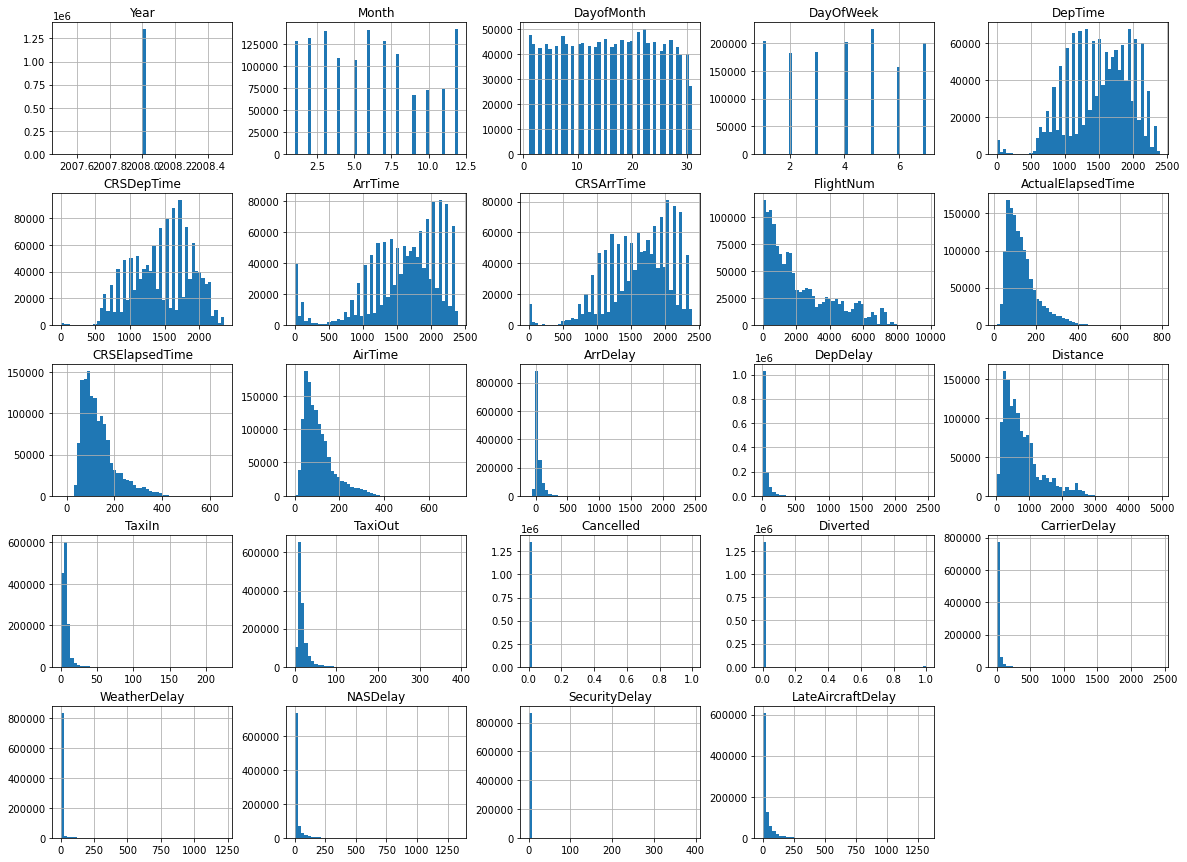

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
X_train.hist(bins=50, figsize=(20,15))
plt.show()

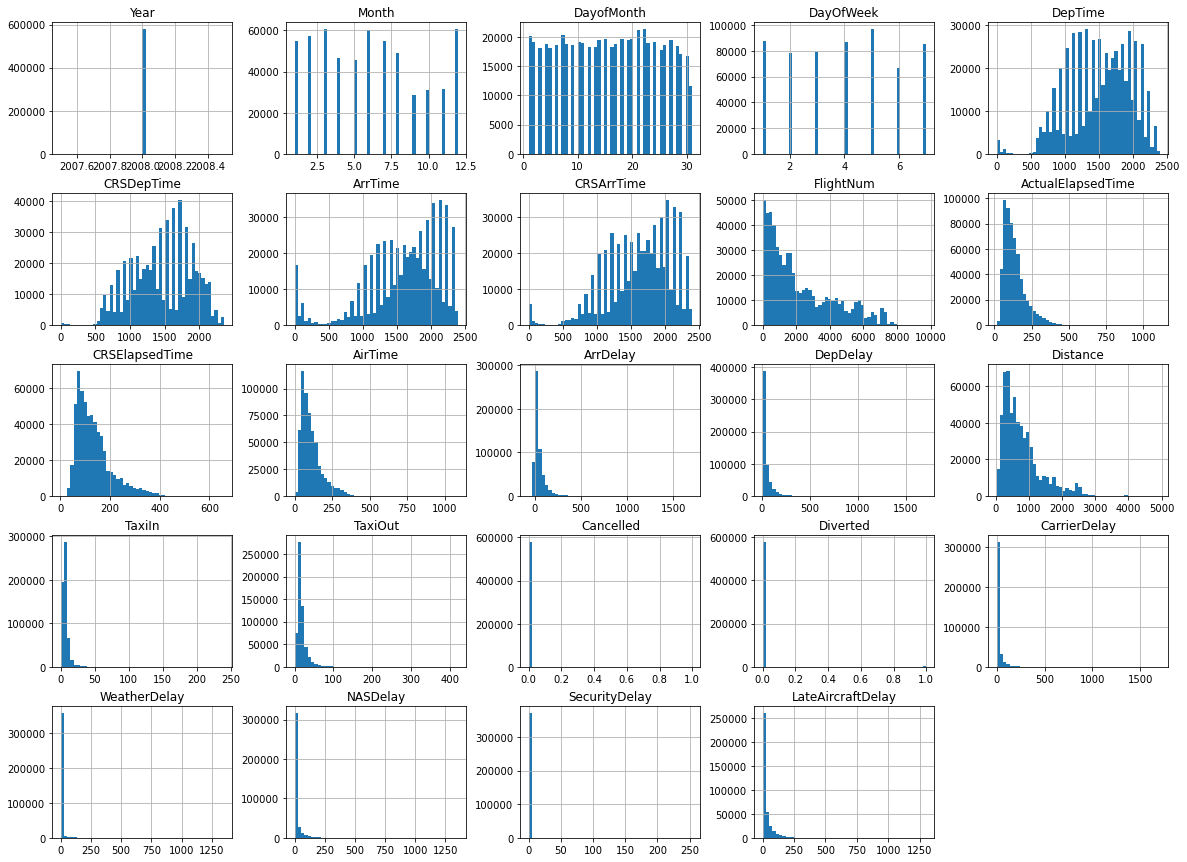

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
X_test.hist(bins=50, figsize=(20,15))
plt.show()

# Exercici 2

Aplica algun procés de transformació (estandarditzar les dades numèriques, crear columnes dummies, polinomis...).

In [24]:
scaler = StandardScaler()

In [25]:
##Voy a estandtartizar las variables 'Distance','ArrDelay', 'DepDelay','AirTime'

In [26]:
df_est=df[['Distance','ArrDelay', 'DepDelay','AirTime']].copy()

In [27]:
df_est.describe().round(3)

,Distance,ArrDelay,DepDelay,AirTime
count,1936758.000,1928371.000,1936758.000,1928371.000
mean,765.686,42.200,43.185,108.277
std,574.480,56.785,53.403,68.643
min,11.000,-109.000,6.000,0.000
25%,338.000,9.000,12.000,58.000
50%,606.000,24.000,24.000,90.000
75%,998.000,56.000,53.000,137.000
max,4962.000,2461.000,2467.000,1091.000


In [28]:
resSd=scaler.fit_transform(df_est)

In [29]:
ressSddf = pd.DataFrame(resSd)

In [32]:
ressSddf.columns=df_est.columns

In [33]:
ressSddf.describe().round(3)

,Distance,ArrDelay,DepDelay,AirTime
count,1936758.000,1928371.000,1936758.000,1928371.000
mean,0.000,0.000,-0.000,0.000
std,1.000,1.000,1.000,1.000
min,-1.314,-2.663,-0.696,-1.577
25%,-0.744,-0.585,-0.584,-0.732
50%,-0.278,-0.321,-0.359,-0.266
75%,0.404,0.243,0.184,0.418
max,7.305,42.596,45.388,14.317


In [34]:
ressSddf['Distance']

0          0.077137
1          0.077137
2         -0.436371
3         -0.436371
4         -0.135229
             ...   
1936753    0.244245
1936754   -0.495555
1936755   -0.133488
1936756   -0.405038
1936757    0.188543
Name: Distance, Length: 1936758, dtype: float64

In [35]:
ressSddf.head()

,Distance,ArrDelay,DepDelay,AirTime
0,0.077137,-0.989701,-0.658868,0.112508
1,0.077137,-0.707935,-0.452885,0.068804
2,-0.436371,-0.496611,-0.658868,-0.470220
3,-0.436371,-0.144403,-0.171999,-0.455652
4,-0.135229,-0.549442,-0.340531,-0.309970


Voy a crear columna nueva donde voy a indicar si el vuelo ha llegado tarde o no si ha llegado a tiempo o antes 0, si ha llegado entre 0 y 30 min 1, si ha llegado entre 30 y 60 min de retraso 2, y si ha llegado mas tarde que 1 hora -1


In [36]:
df['retraso'] = np.where(
     df['ArrDelay'].between(0, 15, inclusive=False), 1, 
     np.where(
        df['ArrDelay'].between(15, 45, inclusive=False), 2,3
     )
)

In [37]:
df['retraso'] = np.select(
    [
        df['ArrDelay']<=0,
        df['ArrDelay'].between(0, 30, inclusive=False), 
        df['ArrDelay'].between(30, 60, inclusive=True),
        
    ], 
    [
        0,
        1, 
        2
    ], 
    default=-1
)

In [38]:
df.retraso.value_counts()

 1    872390
-1    447562
 2    411850
 0    204956
Name: retraso, dtype: int64

In [39]:
dummyCN= pd.get_dummies(df["CancellationCode"],prefix='cn_')


In [40]:
dummyCN.head()

,cn__A,cn__B,cn__C,cn__N
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [41]:
dummyCN.columns=['C_carrier','C_weather','C_NAS','C_security']

In [42]:
#creo dataframe a partir de DF dummys
dfdummy=pd.concat([df,dummyCN],axis=1)

In [43]:
aux=dummyCN.columns.values.tolist()
aux.append('Cancelled')

In [44]:
dfdummy[aux].value_counts()

C_carrier  C_weather  C_NAS  C_security  Cancelled
0          0          0      1           0            1936125
           1          0      0           1                307
1          0          0      0           1                246
0          0          1      0           1                 80
dtype: int64

In [45]:
#dfdummy[(dfdummy['C_security'] ==1) & (dfdummy['Cancelled'] == 1)]

In [46]:
dfdummy.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,retraso,C_carrier,C_weather,C_NAS,C_security
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN,1,0,0,0,1
2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN,1,0,0,0,1
3,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0,2,0,0,0,1
4,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN,1,0,0,0,1


Polinomio

Creo polinomio con dos variables ArrTime y ArrDelay


In [47]:
polinomio = PolynomialFeatures(2)

Eliminos los valores nulo para poder aplicar el metodo Polinomio

In [48]:
dfsinnul = df.copy().dropna()

In [49]:
polin = polinomio.fit_transform(dfsinnul[['ArrTime','ArrDelay']])
polin

array([[1.000000e+00, 1.959000e+03, 3.400000e+01, 3.837681e+06,
        6.660600e+04, 1.156000e+03],
       [1.000000e+00, 2.037000e+03, 5.700000e+01, 4.149369e+06,
        1.161090e+05, 3.249000e+03],
       [1.000000e+00, 1.845000e+03, 8.000000e+01, 3.404025e+06,
        1.476000e+05, 6.400000e+03],
       ...,
       [1.000000e+00, 1.617000e+03, 2.500000e+01, 2.614689e+06,
        4.042500e+04, 6.250000e+02],
       [1.000000e+00, 9.040000e+02, 7.500000e+01, 8.172160e+05,
        6.780000e+04, 5.625000e+03],
       [1.000000e+00, 1.149000e+03, 9.900000e+01, 1.320201e+06,
        1.137510e+05, 9.801000e+03]])

In [50]:
polin.shape [1, a, b, a^2, ab, b^2].

(1247486, 6)

In [52]:
polin=pd.DataFrame(polin,columns=['constanta','ArrTime','ArrDelay','ArrTime^2','ArrTime x ArrDelay','ArrDelay^2'])

In [53]:
polin.head()

,constanta,ArrTime,ArrDelay,ArrTime^2,ArrTime x ArrDelay,ArrDelay^2
0,1.0,1959.0,34.0,3837681.0,66606.0,1156.0
1,1.0,2037.0,57.0,4149369.0,116109.0,3249.0
2,1.0,1845.0,80.0,3404025.0,147600.0,6400.0
3,1.0,1640.0,15.0,2689600.0,24600.0,225.0
4,1.0,1526.0,16.0,2328676.0,24416.0,256.0


# Exercici 3

Resumeix les noves columnes generades de manera estadística i gràfica

Las variables estandartizadas 'Distance','ArrDelay', 'DepDelay','AirTime'

array([[<AxesSubplot:title={'center':'Distance'}>,
        <AxesSubplot:title={'center':'ArrDelay'}>],
       [<AxesSubplot:title={'center':'DepDelay'}>,
        <AxesSubplot:title={'center':'AirTime'}>]], dtype=object)

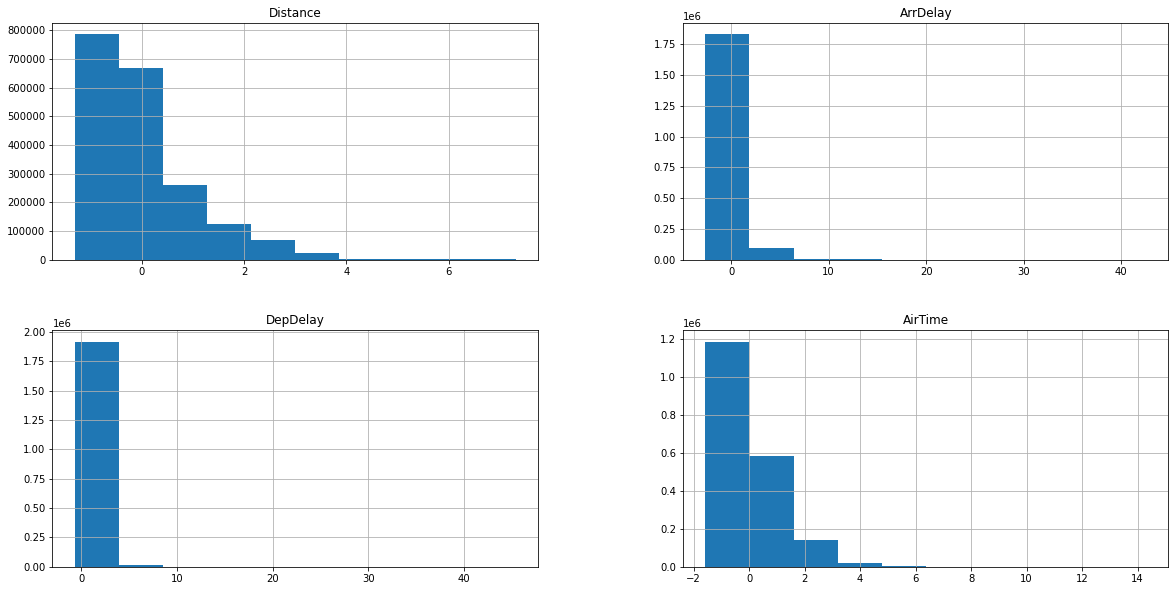

In [82]:
ressSddf.hist(figsize=(20,10))

array([[<AxesSubplot:title={'center':'Distance'}>,
        <AxesSubplot:title={'center':'ArrDelay'}>],
       [<AxesSubplot:title={'center':'DepDelay'}>,
        <AxesSubplot:title={'center':'AirTime'}>]], dtype=object)

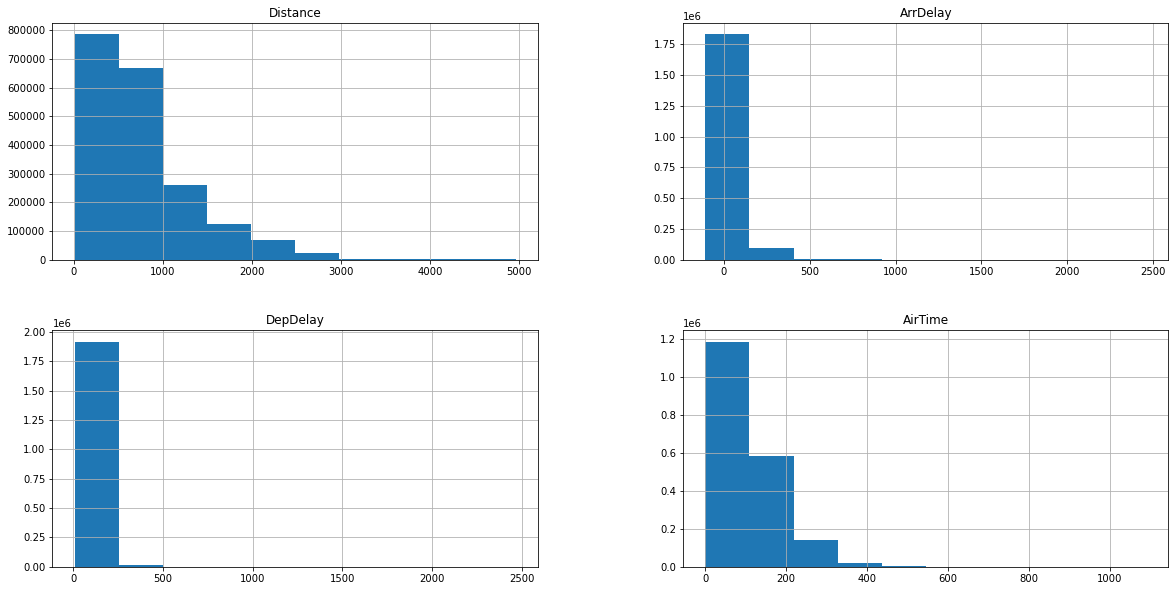

In [84]:
df[['Distance','ArrDelay', 'DepDelay','AirTime']].hist(figsize=(20,10))

In [98]:
#datos originales
df[['Distance','ArrDelay', 'DepDelay','AirTime']].describe().round(2)

,Distance,ArrDelay,DepDelay,AirTime
count,1936758.00,1928371.00,1936758.00,1928371.00
mean,765.69,42.20,43.19,108.28
std,574.48,56.78,53.40,68.64
min,11.00,-109.00,6.00,0.00
25%,338.00,9.00,12.00,58.00
50%,606.00,24.00,24.00,90.00
75%,998.00,56.00,53.00,137.00
max,4962.00,2461.00,2467.00,1091.00


In [97]:
#datos estandartizados
ressSddf.describe().round(2)

,Distance,ArrDelay,DepDelay,AirTime
count,1936758.00,1928371.00,1936758.00,1928371.00
mean,0.00,0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00
min,-1.31,-2.66,-0.70,-1.58
25%,-0.74,-0.58,-0.58,-0.73
50%,-0.28,-0.32,-0.36,-0.27
75%,0.40,0.24,0.18,0.42
max,7.30,42.60,45.39,14.32


In [54]:
#Polinomio

In [55]:
polin.describe()

,constanta,ArrTime,ArrDelay,ArrTime^2,ArrTime x ArrDelay,ArrDelay^2
count,1247486.0,1.247486e+06,1.247486e+06,1.247486e+06,1.247486e+06,1.247486e+06
mean,1.0,1.616749e+03,6.329104e+01,2.954865e+06,9.951472e+04,7.696776e+03
std,0.0,5.839416e+02,6.075380e+01,1.555081e+06,1.069725e+05,2.944534e+04
min,1.0,1.000000e+00,1.500000e+01,1.000000e+00,1.500000e+01,2.250000e+02
25%,1.0,1.326000e+03,2.600000e+01,1.758276e+06,3.635100e+04,6.760000e+02
50%,1.0,1.737000e+03,4.300000e+01,3.017169e+06,6.448000e+04,1.849000e+03
75%,1.0,2.048000e+03,7.900000e+01,4.194304e+06,1.243440e+05,6.241000e+03
max,1.0,2.400000e+03,2.461000e+03,5.760000e+06,5.552016e+06,6.056521e+06


array([[<AxesSubplot:title={'center':'constanta'}>,
        <AxesSubplot:title={'center':'ArrTime'}>],
       [<AxesSubplot:title={'center':'ArrDelay'}>,
        <AxesSubplot:title={'center':'ArrTime^2'}>],
       [<AxesSubplot:title={'center':'ArrTime x ArrDelay'}>,
        <AxesSubplot:title={'center':'ArrDelay^2'}>]], dtype=object)

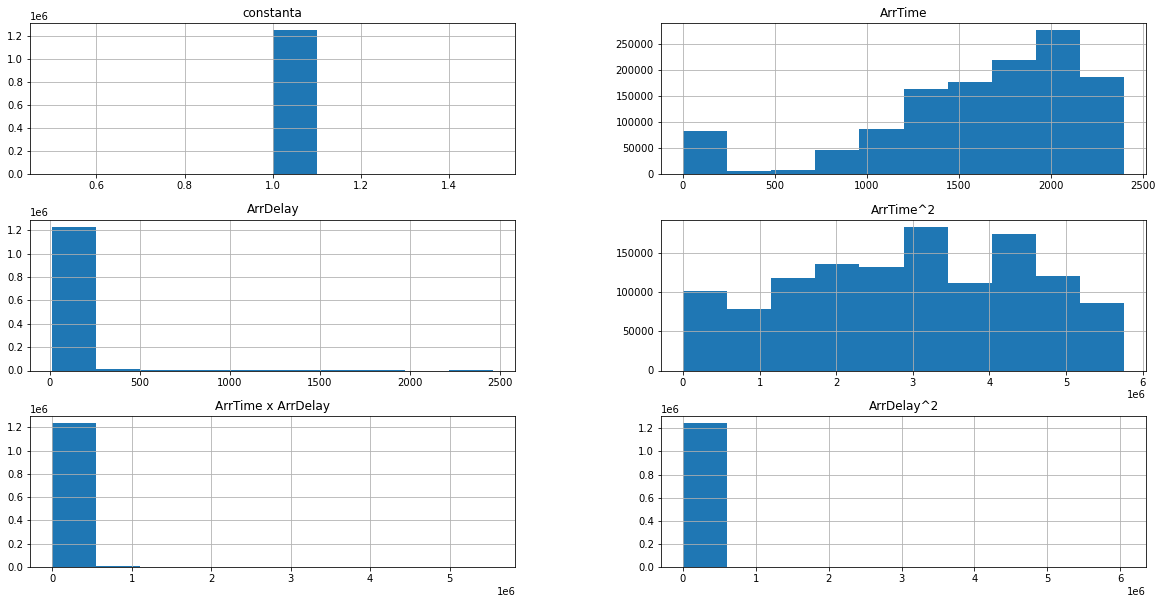

In [59]:
polin.hist(figsize=(20,10))

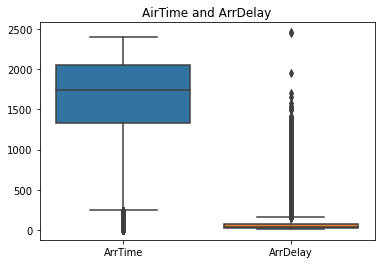

In [76]:
sns.boxplot(data=polin[['ArrTime','ArrDelay']])
plt.title('AirTime and ArrDelay')
plt.show()



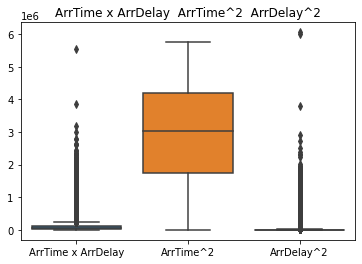

In [79]:
sns.boxplot(data=polin[['ArrTime x ArrDelay','ArrTime^2','ArrDelay^2']])
plt.title('ArrTime x ArrDelay  ArrTime^2  ArrDelay^2')
plt.show()
